In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from shapely import wkt
from shapely.validation import make_valid
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import cluster
import geopandas
from scipy.stats import zscore

county_data is from https://www.kaggle.com/datasets/roche-data-science-coalition/uncover

region_data is from https://jeremyposadas.org/regions/

In [2]:
county_data = pd.read_csv('G:\My Drive\ds_projects\cdcs-social-vulnerability-index-svi-2016-overall-svi-county-level.csv')
region_data = pd.read_excel(r'G:\My Drive\ds_projects\URAmericaMapCountyList.xlsx', skiprows=3, header=0)
county_data.head(5)

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop,objectid,shape_are,shape_len
0,"POLYGON ((-86.9212008685 32.6575481071, -86.92...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,f,f,4852,649,8.9,1.2,40854,1,0.150260,2.052636
1,"POLYGON ((-86.963362945 33.8582273591, -86.959...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,f,f,6388,740,11.2,1.3,42597,2,0.164406,2.392672
2,"POLYGON ((-85.5934395044 32.8972732071, -85.59...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,f,f,3979,544,11.8,1.6,27940,3,0.150587,1.714193
3,"POLYGON ((-86.1963696041 31.4254368653, -86.19...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,f,f,5253,464,10.7,0.9,47236,4,0.167192,1.678611
4,"POLYGON ((-88.1392513191 34.5878014617, -88.13...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,f,f,4932,458,9.1,0.8,56227,5,0.158869,2.175068


In [4]:
county_data['geometry'] = county_data['geometry'].apply(wkt.loads)
county_data = geopandas.GeoDataFrame(county_data)

TypeError: Only str is accepted.

In [16]:
region_data.head(5)

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop,objectid,shape_are,shape_len
0,"POLYGON ((-86.9212008685 32.6575481071, -86.92...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,f,f,4852,649,8.9,1.2,40854,1,0.150260,2.052636
1,"POLYGON ((-86.963362945 33.8582273591, -86.959...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,f,f,6388,740,11.2,1.3,42597,2,0.164406,2.392672
2,"POLYGON ((-85.5934395044 32.8972732071, -85.59...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,f,f,3979,544,11.8,1.6,27940,3,0.150587,1.714193
3,"POLYGON ((-86.1963696041 31.4254368653, -86.19...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,f,f,5253,464,10.7,0.9,47236,4,0.167192,1.678611
4,"POLYGON ((-88.1392513191 34.5878014617, -88.13...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,f,f,4932,458,9.1,0.8,56227,5,0.158869,2.175068


In [5]:
#Merge datasets
county_data = county_data.merge(region_data, left_on='fips', right_on='CountyFIPS')
county_data.head(5)

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,CountyName,CountyFIPS,Region,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg
0,"POLYGON ((-86.92120 32.65755, -86.92036 32.658...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,"Autauga County, Alabama",1001,1,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100
1,"POLYGON ((-86.96336 33.85823, -86.95967 33.857...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,"Blount County, Alabama",1009,2,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100
2,"POLYGON ((-85.59344 32.89727, -85.59334 32.984...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,"Chambers County, Alabama",1017,1,01 Deep South,3,3 Rural/Semi-Rural,33843,355.276725,0.734043,100
3,"POLYGON ((-86.19637 31.42544, -86.19396 31.440...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,"Coffee County, Alabama",1031,1,01 Deep South,3,3 Rural/Semi-Rural,51226,541.904065,1.119636,100
4,"POLYGON ((-88.13925 34.58780, -88.13872 34.589...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,"Colbert County, Alabama",1033,2,02 Appohzarka,3,3 Rural/Semi-Rural,54216,768.079047,1.586940,100


In [7]:
# Convert r Polygon text to shapely polygon
for row_idx, row in county_data.iterrows():
    points = re.findall(r'-?\d+.\d+', row['geometry'].wkt)
    i = 0
    list_points = []
    while i < len(points):
        list_points.append((float(points[i]), float(points[i+1])))
        i+=2
    list_points

    county_shape = Polygon(list_points)
    county_center = county_shape.centroid
    center_points = re.findall(r'-?\d+.\d+', county_center.wkt)
    county_data.at[row_idx, 'center_long'] = float(center_points[0])
    county_data.at[row_idx, 'center_lat'] = float(center_points[1])
    
county_data.head()

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,Region,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg,center_long,center_lat
0,"POLYGON ((-86.92120 32.65755, -86.92036 32.658...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,1,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100,-86.642748,32.534928
1,"POLYGON ((-86.96336 33.85823, -86.95967 33.857...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,2,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100,-86.567383,33.980878
2,"POLYGON ((-85.59344 32.89727, -85.59334 32.984...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,1,01 Deep South,3,3 Rural/Semi-Rural,33843,355.276725,0.734043,100,-85.392033,32.914353
3,"POLYGON ((-86.19637 31.42544, -86.19396 31.440...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,1,01 Deep South,3,3 Rural/Semi-Rural,51226,541.904065,1.119636,100,-85.988159,31.402652
4,"POLYGON ((-88.13925 34.58780, -88.13872 34.589...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,2,02 Appohzarka,3,3 Rural/Semi-Rural,54216,768.079047,1.586940,100,-87.804934,34.700477


<AxesSubplot:>

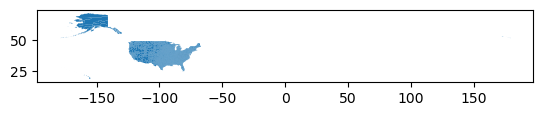

In [36]:
# sns.scatterplot(county_data, x='center_long', y='center_lat', s=1)
county_data.plot()

<AxesSubplot:>

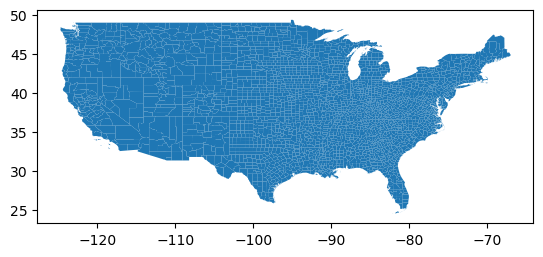

In [8]:
#Drop data from outside the continental US
county_data = county_data[county_data['center_long']<-50]
county_data = county_data[county_data['center_long']>-125]
county_data = county_data[county_data['center_lat']<50]
# sns.scatterplot(county_data, x='center_long', y='center_lat', s=1)
county_data.plot()

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

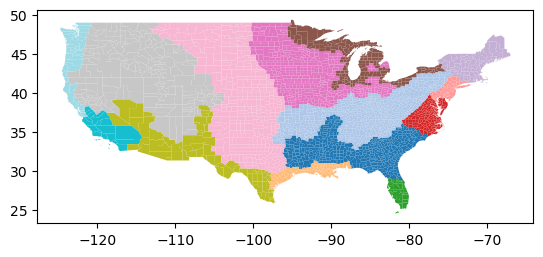

In [42]:
# Plot original region classifications
plt.figure(figsize=(11,10))
# sns.scatterplot(county_data, x='center_long', y='center_lat', hue='Region', s=2, palette='Set1')
county_data.plot('Region', cmap='tab20')

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

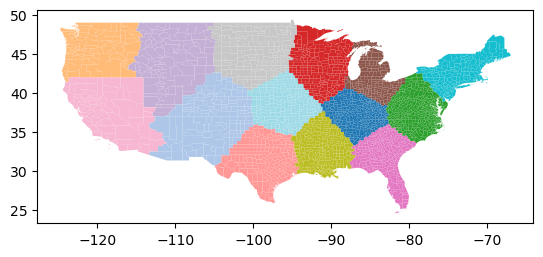

In [43]:
# What if we cluster just based off location?
X = county_data[['center_long', 'center_lat']]
n_regions = len(county_data['Region'].unique())
kmeans = cluster.KMeans(n_clusters=n_regions, random_state=2022)
kmeans.fit(X)
county_data['KMeans_cluster'] = kmeans.labels_
plt.figure(figsize=(11,10))
county_data.plot('KMeans_cluster', cmap='tab20')
# sns.scatterplot(county_data, x='center_long', y='center_lat', hue='KMeans_cluster', s=2, palette='Set1')

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

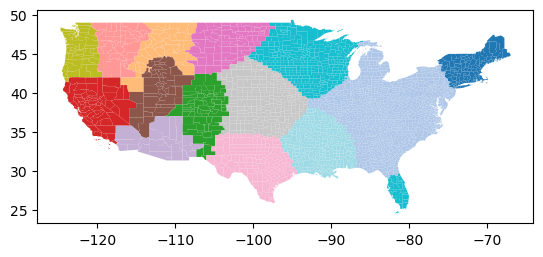

In [56]:
# Other clustering methods?
X = county_data[['center_long', 'center_lat']]
n_regions = len(county_data['Region'].unique())
kmeans = cluster.SpectralClustering(n_clusters=n_regions, random_state=2022)
kmeans.fit(X)
county_data['KMeans_cluster'] = kmeans.labels_
plt.figure(figsize=(11,10))
county_data.plot('KMeans_cluster', cmap='tab20')

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

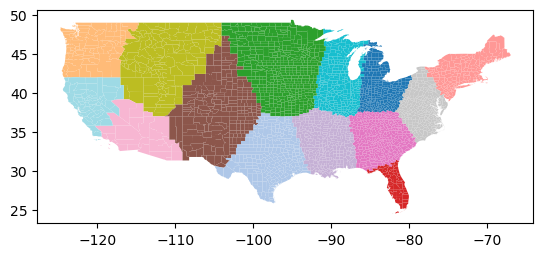

In [44]:
# Weighted by population
kmeans.fit(X, sample_weight=county_data['e_totpop'])
county_data['KMeans_cluster'] = kmeans.labels_
plt.figure(figsize=(11,10))
# sns.scatterplot(county_data, x='center_long', y='center_lat', hue='KMeans_cluster', s=2, palette='Set1')
county_data.plot('KMeans_cluster', cmap='tab20')

This is a simple geographic clustering of counties. However, boundaries of regions (in states, countries, etc) are not only defined by geography, but by people, or culture. 

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

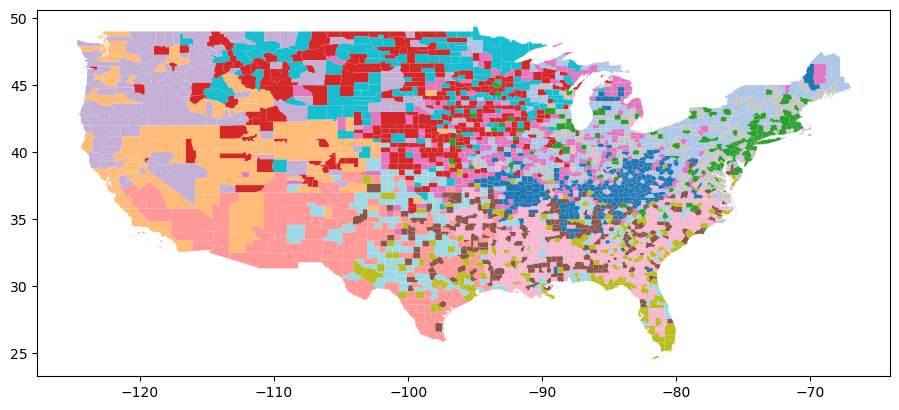

In [179]:
# Include other factors in creating regions
# county_data['center_long_z'] = (county_data.center_long - county_data.center_long.mean())/county_data.center_long.std()
# county_data['center_lat_z'] = (county_data.center_lat - county_data.center_lat.mean())/county_data.center_lat.std()

X = county_data[['center_long', 'center_lat', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4']]
X = X.apply(zscore)
n_regions = len(county_data['Region'].unique())
kmeans = cluster.KMeans(n_clusters=n_regions, random_state=2022)
# kmeans = cluster.AgglomerativeClustering(n_clusters=n_regions)

kmeans.fit(X)
county_data['KMeans_cluster'] = kmeans.labels_
plt.figure(figsize=(11,10))
county_data.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))

However, clustering on these other variables too removes the regional boundaries from the map, making regions mix with one another geographically. Regions should probably be geographically continuous. 

To try to salvage this regional classification, I'd like to redefine counties that are completely separated (non-adjacent) from other counties in the region to belong to the region they are actually most adjacent to. To do so, I've written the function merge_connected_counties. The function takes advantage of geopandas to merge counties that are from the same region and adjacent. Counties that are geographically separate from their region are redefined by whichever region they are most connected to. We can do this indefinitely by merging merged counties, until the merged counties contain a number of counties set by min_threshold.

In [160]:
# county_data.to_pickle(r'C:\Users\mgm24\Documents\datasets\county_data.pkl')
county_data = pd.read_pickle(r'C:\Users\mgm24\Documents\datasets\county_data.pkl')
# TEMP TEST A SUBSET OF THE DATA
# county_data = county_data[county_data['state']=='NEW YORK']
# county_data

In [40]:
def find_next_nearest_center(county_center, clust_centers, cluster):
    """Returns the cluster with the smallest euclidean distance to the county """
    min_dist = 1000
    for i, clust_center in enumerate(clust_centers):
        dist = ((county_center[0] - clust_center[0])**2 + (county_center[1] - clust_center[1])**2)**.5
        if dist < min_dist and not i==cluster:
            min_dist = dist
            closest_cluster = i
    return closest_cluster

In [152]:
def most_connected_cluster(neighbors):
    clusters = np.unique(neighbors.KMeans_cluster)
    if len(clusters) > 0:
        max_adj_clust = 0
        for cluster in clusters:
            num_adj = np.sum(neighbors['KMeans_cluster']==cluster) 
            if num_adj > max_adj_clust:
                max_adj_clust = num_adj
                conn_clust = cluster
        return conn_clust
    else:
        raise 'error'

In [161]:
# Reshape these clusters, such that any time one county is surrounded by other counties,
# it gets its region relabeled as the surrounding region
# Maybe assign them to the cluster with the nearest center

#Correct for invalid geometries
county_data.geometry = county_data.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)
county_data['Connected_cluster'] = county_data['KMeans_cluster']
for i, county in county_data.iterrows():
    neighbors = county_data[~county_data.geometry.disjoint(county.geometry)]
    neighbors = neighbors[neighbors['fips']!=county['fips']]
    if np.sum(county['KMeans_cluster']==neighbors['KMeans_cluster']) == 0: #Not adjacent to any of its own cluster
        county_data.at[i, 'Connected_cluster'] = find_nearest_center([X.loc[i]['center_long'], X.loc[i]['center_lat']], kmeans.cluster_centers_)

county_data.plot('Connected_cluster', cmap='tab20')

C:\Users\mgm24\anaconda3\envs\DS_projects\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


KeyError: 0

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

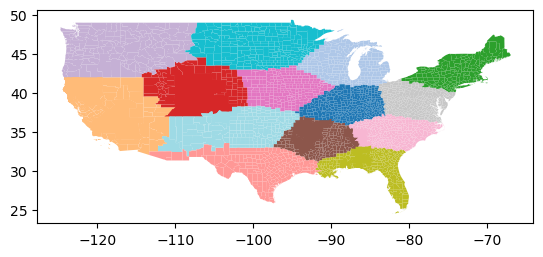

In [37]:
# Now, input these cluster centers and recluster based off only location (easy solution)
X = county_data[['center_long', 'center_lat']]
X = X.apply(zscore)
n_regions = len(county_data['Region'].unique())
kmeans = cluster.KMeans(n_clusters=n_regions, random_state=2022, init=kmeans.cluster_centers_[:,:2], max_iter=1, n_init=1)
kmeans.fit(X)
county_data['KMeans_cluster'] = kmeans.labels_
plt.figure(figsize=(11,10))
county_data.plot('KMeans_cluster', cmap='tab20')

In [174]:
def merge_connected_counties(county_data, min_counties):
    new_df = county_data.copy()
    new_df['Merge_complete'] = False
    new_df['n_counties'] = 1
    while np.sum(new_df['Merge_complete']) < new_df.shape[0]: #No isolated counties
#         new_df.plot('KMeans_cluster', cmap='tab20')
        print('---------------------------------------------')
        print(np.sum(new_df['Merge_complete']) / new_df.shape[0]) 
        print('---------------------------------------------')
        i = 0
        counties_tomerge = new_df[new_df['Merge_complete']==False]
        curr_min_counties = np.min(counties_tomerge['n_counties'])
        county = counties_tomerge[counties_tomerge['n_counties']==curr_min_counties].iloc[0]
#         while i < new_df.shape[0]:
#         county = new_df.iloc[i]
        index = county.name
        neighbors = new_df[~new_df.geometry.disjoint(county.geometry)]
        neighbors = neighbors[neighbors['KMeans_cluster']==county['KMeans_cluster']]
        if county['Merge_complete']==False:
            if neighbors.shape[0] > 1: #adjacent to at least 1 other county in same cluster
                new_df.at[index, 'geometry'] = neighbors.unary_union
                new_df.at[index, 'n_counties'] += np.sum(neighbors['n_counties'])
                neighbors = neighbors[neighbors['fips']!=county['fips']]
                if new_df.at[index, 'n_counties'] >= min_counties:
                    new_df.at[index, 'Merge_complete'] = True
                new_df = new_df.drop(neighbors.index, axis='index')

            else:
#                 next_nearest = find_next_nearest_center([county['center_long'], county['center_lat']], kmeans.cluster_centers_, county['KMeans_cluster'])
#                 new_df['KMeans_cluster'] = next_nearest
                neighbors = new_df[~new_df.geometry.disjoint(county.geometry)]
                neighbors = neighbors[neighbors['fips']!=county['fips']]
                if len(neighbors)>0:
#                     pre_flip = county['KMeans_cluster']
#                     post_flip = most_connected_cluster(neighbors)
                    new_df.at[index,'KMeans_cluster'] = most_connected_cluster(neighbors)

                else: #not adjacent to any other counties (island)
                    new_df.at[index,'Merge_complete'] = True
#             i+=1            
            
    return new_df
    

<AxesSubplot:>

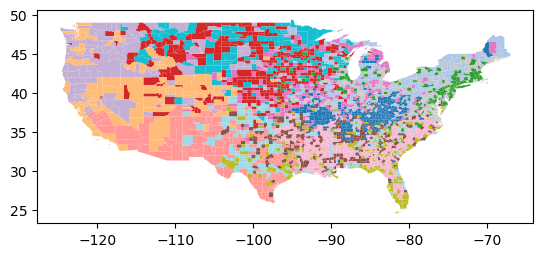

In [173]:
# Good idea to plot the data you have before running the merging

county_data.plot('KMeans_cluster', cmap='tab20')

In [ ]:
county_data.geometry = county_data.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)
merged_data_7 = merge_connected_counties(county_data, 7)
merged_data_20 = merge_connected_counties(county_data, 20)
merged_data_50 = merge_connected_counties(county_data, 50)
merged_data_100 = merge_connected_counties(county_data, 100)
merged_data_200 = merge_connected_counties(county_data, 200)

merged_data_7.to_pickle(r'C:\Users\mgm24\Documents\datasets\merged_data_7.pkl')
merged_data_20.to_pickle(r'C:\Users\mgm24\Documents\datasets\merged_data_20.pkl')
merged_data_50.to_pickle(r'C:\Users\mgm24\Documents\datasets\merged_data_50.pkl')
merged_data_100.to_pickle(r'C:\Users\mgm24\Documents\datasets\merged_data_100.pkl')
merged_data_200.to_pickle(r'C:\Users\mgm24\Documents\datasets\merged_data_200.pkl')

# county = county_data.iloc[1]

# neighbors = county_data.iloc[0:40]
# neighbors.geometry.unary_union
# neighbors.geometry

C:\Users\mgm24\anaconda3\envs\DS_projects\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.00032351989647363315
---------------------------------------------
---------------------------------------------
0.0006476683937823834
---------------------------------------------
---------------------------------------------
0.0006478781988986071
-------------------------------

---------------------------------------------
0.004047217537942664
---------------------------------------------
---------------------------------------------
0.004049949375632805
---------------------------------------------
---------------------------------------------
0.004052684903748734
---------------------------------------------
---------------------------------------------
0.004052684903748734
---------------------------------------------
---------------------------------------------
0.004055424129773572
---------------------------------------------
---------------------------------------------
0.004056795131845842
---------------------------------------------
---------------------------------------------
0.004058167061210686
---------------------------------------------
---------------------------------------------
0.0040609137055837565
---------------------------------------------
---------------------------------------------
0.004062288422477996
----------------------------

---------------------------------------------
0.00808720112517581
---------------------------------------------
---------------------------------------------
0.00809004572634541
---------------------------------------------
---------------------------------------------
0.00809004572634541
---------------------------------------------
---------------------------------------------
0.008098591549295774
---------------------------------------------
---------------------------------------------
0.008101444170482565
---------------------------------------------
---------------------------------------------
0.008107155445893549
---------------------------------------------
---------------------------------------------
0.008107155445893549
---------------------------------------------
---------------------------------------------
0.008112874779541446
---------------------------------------------
---------------------------------------------
0.008112874779541446
--------------------------------

---------------------------------------------
0.01221317542561066
---------------------------------------------
---------------------------------------------
0.01223128243143069
---------------------------------------------
---------------------------------------------
0.012240356083086053
---------------------------------------------
---------------------------------------------
0.012244897959183673
---------------------------------------------
---------------------------------------------
0.012253991830672113
---------------------------------------------
---------------------------------------------
0.01225854383358098
---------------------------------------------
---------------------------------------------
0.012263099219620958
---------------------------------------------
---------------------------------------------
0.01190919240788984
---------------------------------------------
---------------------------------------------
0.011913626209977662
---------------------------------

---------------------------------------------
0.015891472868217054
---------------------------------------------
---------------------------------------------
0.01591614906832298
---------------------------------------------
---------------------------------------------
0.01594090202177294
---------------------------------------------
---------------------------------------------
0.01634877384196185
---------------------------------------------
---------------------------------------------
0.016355140186915886
---------------------------------------------
---------------------------------------------
0.016374269005847954
---------------------------------------------
---------------------------------------------
0.01638065522620905
---------------------------------------------
---------------------------------------------
0.01638065522620905
---------------------------------------------
---------------------------------------------
0.016399843811011325
----------------------------------

---------------------------------------------
0.019975540154912354
---------------------------------------------
---------------------------------------------
0.019975540154912354
---------------------------------------------
---------------------------------------------
0.0199836867862969
---------------------------------------------
---------------------------------------------
0.0199836867862969
---------------------------------------------
---------------------------------------------
0.02000816659861168
---------------------------------------------
---------------------------------------------
0.020016339869281044
---------------------------------------------
---------------------------------------------
0.020032706459525755
---------------------------------------------
---------------------------------------------
0.020040899795501024
---------------------------------------------
---------------------------------------------
0.020049099836333878
----------------------------------

---------------------------------------------
0.024348568987612132
---------------------------------------------
---------------------------------------------
0.02479692176143651
---------------------------------------------
---------------------------------------------
0.024818142918271287
---------------------------------------------
---------------------------------------------
0.024839400428265525
---------------------------------------------
---------------------------------------------
0.024839400428265525
---------------------------------------------
---------------------------------------------
0.02528932704672096
---------------------------------------------
---------------------------------------------
0.02530017152658662
---------------------------------------------
---------------------------------------------
0.025321888412017168
---------------------------------------------
---------------------------------------------
0.02534364261168385
---------------------------------

---------------------------------------------
0.02981029810298103
---------------------------------------------
---------------------------------------------
0.029850746268656716
---------------------------------------------
---------------------------------------------
0.029850746268656716
---------------------------------------------
---------------------------------------------
0.029904848210240146
---------------------------------------------
---------------------------------------------
0.029904848210240146
---------------------------------------------
---------------------------------------------
0.029931972789115645
---------------------------------------------
---------------------------------------------
0.029931972789115645
---------------------------------------------
---------------------------------------------
0.029505220154335
---------------------------------------------
---------------------------------------------
0.03
---------------------------------------------
---

---------------------------------------------
0.032982791586998086
---------------------------------------------
---------------------------------------------
0.033540967896502155
---------------------------------------------
---------------------------------------------
0.034036433365292426
---------------------------------------------
---------------------------------------------
0.034036433365292426
---------------------------------------------
---------------------------------------------
0.034069097888675626
---------------------------------------------
---------------------------------------------
0.034069097888675626
---------------------------------------------
---------------------------------------------
0.034151034151034154
---------------------------------------------
---------------------------------------------
0.034183919114106884
---------------------------------------------
---------------------------------------------
0.034183919114106884
-----------------------------

---------------------------------------------
0.04205128205128205
---------------------------------------------
---------------------------------------------
0.04209445585215606
---------------------------------------------
---------------------------------------------
0.042159383033419026
---------------------------------------------
---------------------------------------------
0.04271744724652599
---------------------------------------------
---------------------------------------------
0.04276146316331788
---------------------------------------------
---------------------------------------------
0.042783505154639176
---------------------------------------------
---------------------------------------------
0.042783505154639176
---------------------------------------------
---------------------------------------------
0.04282765737874097
---------------------------------------------
---------------------------------------------
0.04282765737874097
-----------------------------------

---------------------------------------------
0.05152354570637119
---------------------------------------------
---------------------------------------------
0.052106430155210645
---------------------------------------------
---------------------------------------------
0.052106430155210645
---------------------------------------------
---------------------------------------------
0.05219322598556358
---------------------------------------------
---------------------------------------------
0.052222222222222225
---------------------------------------------
---------------------------------------------
0.052222222222222225
---------------------------------------------
---------------------------------------------
0.052924791086350974
---------------------------------------------
---------------------------------------------
0.052924791086350974
---------------------------------------------
---------------------------------------------
0.05298382598996096
--------------------------------

---------------------------------------------
0.05826397146254459
---------------------------------------------
---------------------------------------------
0.058333333333333334
---------------------------------------------
---------------------------------------------
0.058368076235854674
---------------------------------------------
---------------------------------------------
0.058368076235854674
---------------------------------------------
---------------------------------------------
0.05843768634466309
---------------------------------------------
---------------------------------------------
0.05854241338112306
---------------------------------------------
---------------------------------------------
0.058577405857740586
---------------------------------------------
---------------------------------------------
0.05871779508687837
---------------------------------------------
---------------------------------------------
0.05935251798561151
----------------------------------

---------------------------------------------
0.0674373795761079
---------------------------------------------
---------------------------------------------
0.06748071979434447
---------------------------------------------
---------------------------------------------
0.06752411575562701
---------------------------------------------
---------------------------------------------
0.06756756756756757
---------------------------------------------
---------------------------------------------
0.06765463917525773
---------------------------------------------
---------------------------------------------
0.06769825918762089
---------------------------------------------
---------------------------------------------
0.06774193548387097
---------------------------------------------
---------------------------------------------
0.06778566817301485
---------------------------------------------
---------------------------------------------
0.06796116504854369
---------------------------------------

---------------------------------------------
0.08011049723756906
---------------------------------------------
---------------------------------------------
0.08011049723756906
---------------------------------------------
---------------------------------------------
0.07975034674063801
---------------------------------------------
---------------------------------------------
0.0798056904927134
---------------------------------------------
---------------------------------------------
0.0798056904927134
---------------------------------------------
---------------------------------------------
0.0799721835883171
---------------------------------------------
---------------------------------------------
0.08008356545961003
---------------------------------------------
---------------------------------------------
0.08008356545961003
---------------------------------------------
---------------------------------------------
0.08089260808926081
-----------------------------------------

---------------------------------------------
0.09613928841786526
---------------------------------------------
---------------------------------------------
0.09621212121212121
---------------------------------------------
---------------------------------------------
0.09621212121212121
---------------------------------------------
---------------------------------------------
0.0972644376899696
---------------------------------------------
---------------------------------------------
0.0974124809741248
---------------------------------------------
---------------------------------------------
0.0974124809741248
---------------------------------------------
---------------------------------------------
0.09770992366412214
---------------------------------------------
---------------------------------------------
0.09785932721712538
---------------------------------------------
---------------------------------------------
0.09885057471264368
-----------------------------------------

---------------------------------------------
0.10245901639344263
---------------------------------------------
---------------------------------------------
0.10254306808859721
---------------------------------------------
---------------------------------------------
0.10296540362438221
---------------------------------------------
---------------------------------------------
0.10330578512396695
---------------------------------------------
---------------------------------------------
0.10347682119205298
---------------------------------------------
---------------------------------------------
0.1035625517812759
---------------------------------------------
---------------------------------------------
0.1035625517812759
---------------------------------------------
---------------------------------------------
0.1044776119402985
---------------------------------------------
---------------------------------------------
0.1045643153526971
------------------------------------------

---------------------------------------------
0.11748878923766816
---------------------------------------------
---------------------------------------------
0.11680143755615453
---------------------------------------------
---------------------------------------------
0.11690647482014388
---------------------------------------------
---------------------------------------------
0.11690647482014388
---------------------------------------------
---------------------------------------------
0.11701170117011701
---------------------------------------------
---------------------------------------------
0.11701170117011701
---------------------------------------------
---------------------------------------------
0.11632100991884581
---------------------------------------------
---------------------------------------------
0.11653116531165311
---------------------------------------------
---------------------------------------------
0.1166365280289331
---------------------------------------

---------------------------------------------
0.13060428849902533
---------------------------------------------
---------------------------------------------
0.13060428849902533
---------------------------------------------
---------------------------------------------
0.13073170731707318
---------------------------------------------
---------------------------------------------
0.130859375
---------------------------------------------
---------------------------------------------
0.130859375
---------------------------------------------
---------------------------------------------
0.13111545988258316
---------------------------------------------
---------------------------------------------
0.13137254901960785
---------------------------------------------
---------------------------------------------
0.13150147203140333
---------------------------------------------
---------------------------------------------
0.13150147203140333
---------------------------------------------
--------

---------------------------------------------
0.15092290988056462
---------------------------------------------
---------------------------------------------
0.1512513601741023
---------------------------------------------
---------------------------------------------
0.1512513601741023
---------------------------------------------
---------------------------------------------
0.1514161220043573
---------------------------------------------
---------------------------------------------
0.1514161220043573
---------------------------------------------
---------------------------------------------
0.1515812431842966
---------------------------------------------
---------------------------------------------
0.15148188803512624
---------------------------------------------
---------------------------------------------
0.15198237885462554
---------------------------------------------
---------------------------------------------
0.15198237885462554
-------------------------------------------

---------------------------------------------
0.16930572472594396
---------------------------------------------
---------------------------------------------
0.16951219512195123
---------------------------------------------
---------------------------------------------
0.1687041564792176
---------------------------------------------
---------------------------------------------
0.1689106487148103
---------------------------------------------
---------------------------------------------
0.16911764705882354
---------------------------------------------
---------------------------------------------
0.1683046683046683
---------------------------------------------
---------------------------------------------
0.1683046683046683
---------------------------------------------
---------------------------------------------
0.16974169741697417
---------------------------------------------
---------------------------------------------
0.16974169741697417
------------------------------------------

---------------------------------------------
0.1837837837837838
---------------------------------------------
---------------------------------------------
0.18403247631935046
---------------------------------------------
---------------------------------------------
0.18453188602442333
---------------------------------------------
---------------------------------------------
0.18503401360544217
---------------------------------------------
---------------------------------------------
0.1855388813096862
---------------------------------------------
---------------------------------------------
0.18579234972677597
---------------------------------------------
---------------------------------------------
0.18579234972677597
---------------------------------------------
---------------------------------------------
0.18604651162790697
---------------------------------------------
---------------------------------------------
0.18604651162790697
----------------------------------------

---------------------------------------------
0.2085235920852359
---------------------------------------------
---------------------------------------------
0.2085235920852359
---------------------------------------------
---------------------------------------------
0.20916030534351146
---------------------------------------------
---------------------------------------------
0.20980091883614088
---------------------------------------------
---------------------------------------------
0.21012269938650308
---------------------------------------------
---------------------------------------------
0.21012269938650308
---------------------------------------------
---------------------------------------------
0.20923076923076922
---------------------------------------------
---------------------------------------------
0.20955315870570107
---------------------------------------------
---------------------------------------------
0.21020092735703247
----------------------------------------

---------------------------------------------
0.23117338003502627
---------------------------------------------
---------------------------------------------
0.23117338003502627
---------------------------------------------
---------------------------------------------
0.23157894736842105
---------------------------------------------
---------------------------------------------
0.23157894736842105
---------------------------------------------
---------------------------------------------
0.2306338028169014
---------------------------------------------
---------------------------------------------
0.2310405643738977
---------------------------------------------
---------------------------------------------
0.23185840707964603
---------------------------------------------
---------------------------------------------
0.23185840707964603
---------------------------------------------
---------------------------------------------
0.23309608540925267
----------------------------------------

---------------------------------------------
0.27906976744186046
---------------------------------------------
---------------------------------------------
0.2796610169491525
---------------------------------------------
---------------------------------------------
0.2796610169491525
---------------------------------------------
---------------------------------------------
0.2802547770700637
---------------------------------------------
---------------------------------------------
0.2802547770700637
---------------------------------------------
---------------------------------------------
0.28085106382978725
---------------------------------------------
---------------------------------------------
0.28085106382978725
---------------------------------------------
---------------------------------------------
0.2814498933901919
---------------------------------------------
---------------------------------------------
0.2814498933901919
--------------------------------------------

---------------------------------------------
0.3228346456692913
---------------------------------------------
---------------------------------------------
0.3236842105263158
---------------------------------------------
---------------------------------------------
0.3236842105263158
---------------------------------------------
---------------------------------------------
0.3245382585751979
---------------------------------------------
---------------------------------------------
0.3245382585751979
---------------------------------------------
---------------------------------------------
0.3253968253968254
---------------------------------------------
---------------------------------------------
0.3297587131367292
---------------------------------------------
---------------------------------------------
0.3297587131367292
---------------------------------------------
---------------------------------------------
0.33153638814016173
---------------------------------------------


---------------------------------------------
0.39184952978056425
---------------------------------------------
---------------------------------------------
0.39308176100628933
---------------------------------------------
---------------------------------------------
0.39747634069400634
---------------------------------------------
---------------------------------------------
0.40189873417721517
---------------------------------------------
---------------------------------------------
0.40189873417721517
---------------------------------------------
---------------------------------------------
0.4031746031746032
---------------------------------------------
---------------------------------------------
0.4031746031746032
---------------------------------------------
---------------------------------------------
0.4057507987220447
---------------------------------------------
---------------------------------------------
0.4057507987220447
------------------------------------------

---------------------------------------------
0.4962121212121212
---------------------------------------------
---------------------------------------------
0.4962121212121212
---------------------------------------------
---------------------------------------------
0.49809885931558934
---------------------------------------------
---------------------------------------------
0.5038167938931297
---------------------------------------------
---------------------------------------------
0.5038167938931297
---------------------------------------------
---------------------------------------------
0.5096525096525096
---------------------------------------------
---------------------------------------------
0.5096525096525096
---------------------------------------------
---------------------------------------------
0.5097276264591439
---------------------------------------------
---------------------------------------------
0.5097276264591439
---------------------------------------------


---------------------------------------------
0.602803738317757
---------------------------------------------
---------------------------------------------
0.6056338028169014
---------------------------------------------
---------------------------------------------
0.6056338028169014
---------------------------------------------
---------------------------------------------
0.6084905660377359
---------------------------------------------
---------------------------------------------
0.6084905660377359
---------------------------------------------
---------------------------------------------
0.6095238095238096
---------------------------------------------
---------------------------------------------
0.6095238095238096
---------------------------------------------
---------------------------------------------
0.6124401913875598
---------------------------------------------
---------------------------------------------
0.6124401913875598
---------------------------------------------
--

---------------------------------------------
0.7756410256410257
---------------------------------------------
---------------------------------------------
0.7756410256410257
---------------------------------------------
---------------------------------------------
0.7806451612903226
---------------------------------------------
---------------------------------------------
0.7806451612903226
---------------------------------------------
---------------------------------------------
0.7857142857142857
---------------------------------------------
---------------------------------------------
0.7857142857142857
---------------------------------------------
---------------------------------------------
0.7894736842105263
---------------------------------------------
---------------------------------------------
0.7947019867549668
---------------------------------------------
---------------------------------------------
0.8
---------------------------------------------
----------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.00035829451809387314
---------------------------------------------
---------------------------------------------
0.00035855145213338117
---------------------------------------------
---------------------------------------------
0.0003586800573888092
---------------------------------------------
---------------------------------------------
0.0003589375448671931
---------------------------------------------
---------------------------------------------
0.0003589375448671931
---------------------------------------------
---------------------------------------------
0.00035919540229885057
---------------------------------------------
---------------------------------------------
0.00035919540229885057
---------------------------------------------
---------------------------------------------
0.00035971223021582735
---------------------------------------------
---------------------------------------------
0.0007202016564638099
---------------

---------------------------------------------
0.0018846588767433095
---------------------------------------------
---------------------------------------------
0.001887504718761797
---------------------------------------------
---------------------------------------------
0.001887504718761797
---------------------------------------------
---------------------------------------------
0.001889644746787604
---------------------------------------------
---------------------------------------------
0.001889644746787604
---------------------------------------------
---------------------------------------------
0.0018917896329928112
---------------------------------------------
---------------------------------------------
0.001893222264293828
---------------------------------------------
---------------------------------------------
0.001893222264293828
---------------------------------------------
---------------------------------------------
0.0018960940462646946
--------------------------

---------------------------------------------
0.0031633056544088573
---------------------------------------------
---------------------------------------------
0.0031633056544088573
---------------------------------------------
---------------------------------------------
0.0031658092599920855
---------------------------------------------
---------------------------------------------
0.003167062549485352
---------------------------------------------
---------------------------------------------
0.003167062549485352
---------------------------------------------
---------------------------------------------
0.003169572107765452
---------------------------------------------
---------------------------------------------
0.003169572107765452
---------------------------------------------
---------------------------------------------
0.0031708283789139914
---------------------------------------------
---------------------------------------------
0.0031708283789139914
------------------------

---------------------------------------------
0.004530477759472817
---------------------------------------------
---------------------------------------------
0.004532344458178822
---------------------------------------------
---------------------------------------------
0.004534212695795548
---------------------------------------------
---------------------------------------------
0.004537953795379538
---------------------------------------------
---------------------------------------------
0.004539826661163846
---------------------------------------------
---------------------------------------------
0.004539826661163846
---------------------------------------------
---------------------------------------------
0.004956629491945477
---------------------------------------------
---------------------------------------------
0.004956629491945477
---------------------------------------------
---------------------------------------------
0.004964832436905255
-----------------------------

---------------------------------------------
0.006105538595726123
---------------------------------------------
---------------------------------------------
0.006105538595726123
---------------------------------------------
---------------------------------------------
0.006108202443280977
---------------------------------------------
---------------------------------------------
0.006110868616324749
---------------------------------------------
---------------------------------------------
0.006110868616324749
---------------------------------------------
---------------------------------------------
0.006118881118881119
---------------------------------------------
---------------------------------------------
0.006121556624398776
---------------------------------------------
---------------------------------------------
0.00612691466083151
---------------------------------------------
---------------------------------------------
0.00612691466083151
-------------------------------

---------------------------------------------
0.006890215893431328
---------------------------------------------
---------------------------------------------
0.006896551724137931
---------------------------------------------
---------------------------------------------
0.006896551724137931
---------------------------------------------
---------------------------------------------
0.0068997240110395585
---------------------------------------------
---------------------------------------------
0.0069124423963133645
---------------------------------------------
---------------------------------------------
0.0069124423963133645
---------------------------------------------
---------------------------------------------
0.006918819188191882
---------------------------------------------
---------------------------------------------
0.00692201199815413
---------------------------------------------
---------------------------------------------
0.00692201199815413
----------------------------

---------------------------------------------
0.008370260955194485
---------------------------------------------
---------------------------------------------
0.00839091806515301
---------------------------------------------
---------------------------------------------
0.008403361344537815
---------------------------------------------
---------------------------------------------
0.008407517309594461
---------------------------------------------
---------------------------------------------
0.008415841584158416
---------------------------------------------
---------------------------------------------
0.008420009905894007
---------------------------------------------
---------------------------------------------
0.00842418235877106
---------------------------------------------
---------------------------------------------
0.008432539682539682
---------------------------------------------
---------------------------------------------
0.008432539682539682
-------------------------------

---------------------------------------------
0.00946372239747634
---------------------------------------------
---------------------------------------------
0.009478672985781991
---------------------------------------------
---------------------------------------------
0.009488666315234581
---------------------------------------------
---------------------------------------------
0.009488666315234581
---------------------------------------------
---------------------------------------------
0.009503695881731784
---------------------------------------------
---------------------------------------------
0.009513742071881607
---------------------------------------------
---------------------------------------------
0.009533898305084746
---------------------------------------------
---------------------------------------------
0.009554140127388535
---------------------------------------------
---------------------------------------------
0.009564293304994687
------------------------------

---------------------------------------------
0.011357183418512209
---------------------------------------------
---------------------------------------------
0.011357183418512209
---------------------------------------------
---------------------------------------------
0.01137009664582149
---------------------------------------------
---------------------------------------------
0.01137009664582149
---------------------------------------------
---------------------------------------------
0.011958997722095672
---------------------------------------------
---------------------------------------------
0.011958997722095672
---------------------------------------------
---------------------------------------------
0.011965811965811967
---------------------------------------------
---------------------------------------------
0.011993146773272416
---------------------------------------------
---------------------------------------------
0.011993146773272416
-------------------------------

---------------------------------------------
0.013990267639902677
---------------------------------------------
---------------------------------------------
0.013990267639902677
---------------------------------------------
---------------------------------------------
0.014007308160779537
---------------------------------------------
---------------------------------------------
0.014634146341463415
---------------------------------------------
---------------------------------------------
0.01464307504575961
---------------------------------------------
---------------------------------------------
0.01464307504575961
---------------------------------------------
---------------------------------------------
0.014660965180207697
---------------------------------------------
---------------------------------------------
0.014678899082568808
---------------------------------------------
---------------------------------------------
0.014696876913655848
-------------------------------

---------------------------------------------
0.016971279373368148
---------------------------------------------
---------------------------------------------
0.016971279373368148
---------------------------------------------
---------------------------------------------
0.01699346405228758
---------------------------------------------
---------------------------------------------
0.017026850032743943
---------------------------------------------
---------------------------------------------
0.01703800786369594
---------------------------------------------
---------------------------------------------
0.01703800786369594
---------------------------------------------
---------------------------------------------
0.01706036745406824
---------------------------------------------
---------------------------------------------
0.017082785808147174
---------------------------------------------
---------------------------------------------
0.017105263157894738
---------------------------------

---------------------------------------------
0.019649122807017545
---------------------------------------------
---------------------------------------------
0.019649122807017545
---------------------------------------------
---------------------------------------------
0.019676739283204497
---------------------------------------------
---------------------------------------------
0.019676739283204497
---------------------------------------------
---------------------------------------------
0.01969057665260197
---------------------------------------------
---------------------------------------------
0.01971830985915493
---------------------------------------------
---------------------------------------------
0.019760056457304165
---------------------------------------------
---------------------------------------------
0.019787985865724382
---------------------------------------------
---------------------------------------------
0.019815994338287332
-------------------------------

---------------------------------------------
0.02382782475019216
---------------------------------------------
---------------------------------------------
0.02386451116243264
---------------------------------------------
---------------------------------------------
0.02386451116243264
---------------------------------------------
---------------------------------------------
0.023901310717039322
---------------------------------------------
---------------------------------------------
0.023919753086419752
---------------------------------------------
---------------------------------------------
0.023919753086419752
---------------------------------------------
---------------------------------------------
0.02472952086553323
---------------------------------------------
---------------------------------------------
0.02472952086553323
---------------------------------------------
---------------------------------------------
0.02474864655839134
-----------------------------------

---------------------------------------------
0.026622296173044926
---------------------------------------------
---------------------------------------------
0.026644462947543714
---------------------------------------------
---------------------------------------------
0.02666666666666667
---------------------------------------------
---------------------------------------------
0.02666666666666667
---------------------------------------------
---------------------------------------------
0.026733500417710943
---------------------------------------------
---------------------------------------------
0.026778242677824266
---------------------------------------------
---------------------------------------------
0.026823134953897737
---------------------------------------------
---------------------------------------------
0.026823134953897737
---------------------------------------------
---------------------------------------------
0.026028547439126783
-------------------------------

---------------------------------------------
0.03193430656934307
---------------------------------------------
---------------------------------------------
0.03205128205128205
---------------------------------------------
---------------------------------------------
0.03213957759412305
---------------------------------------------
---------------------------------------------
0.03216911764705882
---------------------------------------------
---------------------------------------------
0.03228782287822878
---------------------------------------------
---------------------------------------------
0.032317636195752536
---------------------------------------------
---------------------------------------------
0.03234750462107209
---------------------------------------------
---------------------------------------------
0.032467532467532464
---------------------------------------------
---------------------------------------------
0.032527881040892194
-----------------------------------

---------------------------------------------
0.036742800397219465
---------------------------------------------
---------------------------------------------
0.036779324055666
---------------------------------------------
---------------------------------------------
0.03681592039800995
---------------------------------------------
---------------------------------------------
0.03681592039800995
---------------------------------------------
---------------------------------------------
0.036889332003988036
---------------------------------------------
---------------------------------------------
0.036889332003988036
---------------------------------------------
---------------------------------------------
0.036926147704590816
---------------------------------------------
---------------------------------------------
0.036926147704590816
---------------------------------------------
---------------------------------------------
0.03696303696303696
-----------------------------------

---------------------------------------------
0.04189636163175303
---------------------------------------------
---------------------------------------------
0.042081949058693245
---------------------------------------------
---------------------------------------------
0.04318936877076412
---------------------------------------------
---------------------------------------------
0.043237250554323724
---------------------------------------------
---------------------------------------------
0.043237250554323724
---------------------------------------------
---------------------------------------------
0.04328523862375139
---------------------------------------------
---------------------------------------------
0.04328523862375139
---------------------------------------------
---------------------------------------------
0.043333333333333335
---------------------------------------------
---------------------------------------------
0.043333333333333335
---------------------------------

---------------------------------------------
0.05432098765432099
---------------------------------------------
---------------------------------------------
0.054388133498145856
---------------------------------------------
---------------------------------------------
0.054455445544554455
---------------------------------------------
---------------------------------------------
0.054455445544554455
---------------------------------------------
---------------------------------------------
0.05452292441140025
---------------------------------------------
---------------------------------------------
0.05452292441140025
---------------------------------------------
---------------------------------------------
0.05459057071960298
---------------------------------------------
---------------------------------------------
0.05459057071960298
---------------------------------------------
---------------------------------------------
0.0546583850931677
------------------------------------

---------------------------------------------
0.06085753803596127
---------------------------------------------
---------------------------------------------
0.06085753803596127
---------------------------------------------
---------------------------------------------
0.06102635228848821
---------------------------------------------
---------------------------------------------
0.06102635228848821
---------------------------------------------
---------------------------------------------
0.061196105702364396
---------------------------------------------
---------------------------------------------
0.06128133704735376
---------------------------------------------
---------------------------------------------
0.06128133704735376
---------------------------------------------
---------------------------------------------
0.061366806136680614
---------------------------------------------
---------------------------------------------
0.061366806136680614
-----------------------------------

---------------------------------------------
0.07266982622432859
---------------------------------------------
---------------------------------------------
0.07278481012658228
---------------------------------------------
---------------------------------------------
0.07301587301587302
---------------------------------------------
---------------------------------------------
0.07301587301587302
---------------------------------------------
---------------------------------------------
0.07313195548489666
---------------------------------------------
---------------------------------------------
0.07313195548489666
---------------------------------------------
---------------------------------------------
0.0732484076433121
---------------------------------------------
---------------------------------------------
0.0732484076433121
---------------------------------------------
---------------------------------------------
0.07348242811501597
----------------------------------------

---------------------------------------------
0.08639705882352941
---------------------------------------------
---------------------------------------------
0.0865561694290976
---------------------------------------------
---------------------------------------------
0.0865561694290976
---------------------------------------------
---------------------------------------------
0.08687615526802218
---------------------------------------------
---------------------------------------------
0.08687615526802218
---------------------------------------------
---------------------------------------------
0.08736059479553904
---------------------------------------------
---------------------------------------------
0.08768656716417911
---------------------------------------------
---------------------------------------------
0.08785046728971962
---------------------------------------------
---------------------------------------------
0.08785046728971962
----------------------------------------

---------------------------------------------
0.10714285714285714
---------------------------------------------
---------------------------------------------
0.10786516853932585
---------------------------------------------
---------------------------------------------
0.10810810810810811
---------------------------------------------
---------------------------------------------
0.1085972850678733
---------------------------------------------
---------------------------------------------
0.1085972850678733
---------------------------------------------
---------------------------------------------
0.10909090909090909
---------------------------------------------
---------------------------------------------
0.10909090909090909
---------------------------------------------
---------------------------------------------
0.10755148741418764
---------------------------------------------
---------------------------------------------
0.10829493087557604
----------------------------------------

---------------------------------------------
0.12994350282485875
---------------------------------------------
---------------------------------------------
0.12994350282485875
---------------------------------------------
---------------------------------------------
0.13031161473087818
---------------------------------------------
---------------------------------------------
0.13068181818181818
---------------------------------------------
---------------------------------------------
0.12857142857142856
---------------------------------------------
---------------------------------------------
0.12893982808022922
---------------------------------------------
---------------------------------------------
0.12893982808022922
---------------------------------------------
---------------------------------------------
0.12931034482758622
---------------------------------------------
---------------------------------------------
0.13043478260869565
--------------------------------------

---------------------------------------------
0.15181518151815182
---------------------------------------------
---------------------------------------------
0.152317880794702
---------------------------------------------
---------------------------------------------
0.152317880794702
---------------------------------------------
---------------------------------------------
0.15282392026578073
---------------------------------------------
---------------------------------------------
0.15333333333333332
---------------------------------------------
---------------------------------------------
0.15333333333333332
---------------------------------------------
---------------------------------------------
0.15436241610738255
---------------------------------------------
---------------------------------------------
0.15436241610738255
---------------------------------------------
---------------------------------------------
0.15488215488215487
------------------------------------------

---------------------------------------------
0.19838056680161945
---------------------------------------------
---------------------------------------------
0.2
---------------------------------------------
---------------------------------------------
0.20081967213114754
---------------------------------------------
---------------------------------------------
0.20081967213114754
---------------------------------------------
---------------------------------------------
0.20164609053497942
---------------------------------------------
---------------------------------------------
0.20164609053497942
---------------------------------------------
---------------------------------------------
0.2024793388429752
---------------------------------------------
---------------------------------------------
0.2024793388429752
---------------------------------------------
---------------------------------------------
0.2033195020746888
---------------------------------------------
-----------

---------------------------------------------
0.2602040816326531
---------------------------------------------
---------------------------------------------
0.2602040816326531
---------------------------------------------
---------------------------------------------
0.26153846153846155
---------------------------------------------
---------------------------------------------
0.26153846153846155
---------------------------------------------
---------------------------------------------
0.26288659793814434
---------------------------------------------
---------------------------------------------
0.26288659793814434
---------------------------------------------
---------------------------------------------
0.26424870466321243
---------------------------------------------
---------------------------------------------
0.27225130890052357
---------------------------------------------
---------------------------------------------
0.2736842105263158
-----------------------------------------

---------------------------------------------
0.34285714285714286
---------------------------------------------
---------------------------------------------
0.34285714285714286
---------------------------------------------
---------------------------------------------
0.34782608695652173
---------------------------------------------
---------------------------------------------
0.34782608695652173
---------------------------------------------
---------------------------------------------
0.35036496350364965
---------------------------------------------
---------------------------------------------
0.35036496350364965
---------------------------------------------
---------------------------------------------
0.35294117647058826
---------------------------------------------
---------------------------------------------
0.35294117647058826
---------------------------------------------
---------------------------------------------
0.35555555555555557
--------------------------------------

---------------------------------------------
0.5287356321839081
---------------------------------------------
---------------------------------------------
0.5287356321839081
---------------------------------------------
---------------------------------------------
0.5294117647058824
---------------------------------------------
---------------------------------------------
0.5294117647058824
---------------------------------------------
---------------------------------------------
0.5421686746987951
---------------------------------------------
---------------------------------------------
0.5421686746987951
---------------------------------------------
---------------------------------------------
0.5487804878048781
---------------------------------------------
---------------------------------------------
0.5487804878048781
---------------------------------------------
---------------------------------------------
0.5555555555555556
---------------------------------------------
-

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0004042037186742118
---------------------------------------------
----------------------

---------------------------------------------
0.0008417508417508417
---------------------------------------------
---------------------------------------------
0.0008421052631578948
---------------------------------------------
---------------------------------------------
0.0008421052631578948
---------------------------------------------
---------------------------------------------
0.0008428150021070375
---------------------------------------------
---------------------------------------------
0.0008438818565400844
---------------------------------------------
---------------------------------------------
0.0008438818565400844
---------------------------------------------
---------------------------------------------
0.001266891891891892
---------------------------------------------
---------------------------------------------
0.001267962806424345
---------------------------------------------
---------------------------------------------
0.001267962806424345
-----------------------

---------------------------------------------
0.0017761989342806395
---------------------------------------------
---------------------------------------------
0.0017777777777777779
---------------------------------------------
---------------------------------------------
0.0017777777777777779
---------------------------------------------
---------------------------------------------
0.0017801513128615932
---------------------------------------------
---------------------------------------------
0.0017809439002671415
---------------------------------------------
---------------------------------------------
0.0017817371937639199
---------------------------------------------
---------------------------------------------
0.001784121320249777
---------------------------------------------
---------------------------------------------
0.0017857142857142857
---------------------------------------------
---------------------------------------------
0.0017857142857142857
---------------------

---------------------------------------------
0.0023518344308560675
---------------------------------------------
---------------------------------------------
0.00235626767200754
---------------------------------------------
---------------------------------------------
0.0023573785950023575
---------------------------------------------
---------------------------------------------
0.0023584905660377358
---------------------------------------------
---------------------------------------------
0.0023596035865974517
---------------------------------------------
---------------------------------------------
0.0023618327822390174
---------------------------------------------
---------------------------------------------
0.002364066193853428
---------------------------------------------
---------------------------------------------
0.0023651844843897824
---------------------------------------------
---------------------------------------------
0.00236630383341221
-------------------------

---------------------------------------------
0.002534211860111505
---------------------------------------------
---------------------------------------------
0.0025367833587011668
---------------------------------------------
---------------------------------------------
0.0025380710659898475
---------------------------------------------
---------------------------------------------
0.0025393600812595226
---------------------------------------------
---------------------------------------------
0.002540650406504065
---------------------------------------------
---------------------------------------------
0.002541942043721403
---------------------------------------------
---------------------------------------------
0.00254323499491353
---------------------------------------------
---------------------------------------------
0.0025471217524197657
---------------------------------------------
---------------------------------------------
0.0025484199796126403
-------------------------

---------------------------------------------
0.002702702702702703
---------------------------------------------
---------------------------------------------
0.0027056277056277055
---------------------------------------------
---------------------------------------------
0.0027070925825663237
---------------------------------------------
---------------------------------------------
0.0027070925825663237
---------------------------------------------
---------------------------------------------
0.0027100271002710027
---------------------------------------------
---------------------------------------------
0.002720348204570185
---------------------------------------------
---------------------------------------------
0.0027218290691344584
---------------------------------------------
---------------------------------------------
0.0027233115468409588
---------------------------------------------
---------------------------------------------
0.0027233115468409588
----------------------

---------------------------------------------
0.003474232773595831
---------------------------------------------
---------------------------------------------
0.0034802784222737818
---------------------------------------------
---------------------------------------------
0.003486345148169669
---------------------------------------------
---------------------------------------------
0.0034904013961605585
---------------------------------------------
---------------------------------------------
0.003498542274052478
---------------------------------------------
---------------------------------------------
0.003500583430571762
---------------------------------------------
---------------------------------------------
0.003500583430571762
---------------------------------------------
---------------------------------------------
0.003510825043885313
---------------------------------------------
---------------------------------------------
0.00351288056206089
----------------------------

---------------------------------------------
0.0037735849056603774
---------------------------------------------
---------------------------------------------
0.003775959723096287
---------------------------------------------
---------------------------------------------
0.0037854889589905363
---------------------------------------------
---------------------------------------------
0.003787878787878788
---------------------------------------------
---------------------------------------------
0.0037926675094816687
---------------------------------------------
---------------------------------------------
0.0037974683544303796
---------------------------------------------
---------------------------------------------
0.0038022813688212928
---------------------------------------------
---------------------------------------------
0.0038022813688212928
---------------------------------------------
---------------------------------------------
0.003804692454026633
-----------------------

---------------------------------------------
0.005405405405405406
---------------------------------------------
---------------------------------------------
0.005405405405405406
---------------------------------------------
---------------------------------------------
0.005416384563303994
---------------------------------------------
---------------------------------------------
0.005431093007467753
---------------------------------------------
---------------------------------------------
0.005434782608695652
---------------------------------------------
---------------------------------------------
0.005438477226376614
---------------------------------------------
---------------------------------------------
0.005438477226376614
---------------------------------------------
---------------------------------------------
0.005445881552076242
---------------------------------------------
---------------------------------------------
0.005445881552076242
-----------------------------

---------------------------------------------
0.005865102639296188
---------------------------------------------
---------------------------------------------
0.00586940572267058
---------------------------------------------
---------------------------------------------
0.0058823529411764705
---------------------------------------------
---------------------------------------------
0.0058823529411764705
---------------------------------------------
---------------------------------------------
0.005891016200294551
---------------------------------------------
---------------------------------------------
0.005891016200294551
---------------------------------------------
---------------------------------------------
0.005908419497784343
---------------------------------------------
---------------------------------------------
0.005908419497784343
---------------------------------------------
---------------------------------------------
0.005912786400591279
----------------------------

---------------------------------------------
0.006314127861089187
---------------------------------------------
---------------------------------------------
0.006329113924050633
---------------------------------------------
---------------------------------------------
0.006344171292624901
---------------------------------------------
---------------------------------------------
0.006344171292624901
---------------------------------------------
---------------------------------------------
0.006349206349206349
---------------------------------------------
---------------------------------------------
0.006359300476947536
---------------------------------------------
---------------------------------------------
0.006369426751592357
---------------------------------------------
---------------------------------------------
0.006369426751592357
---------------------------------------------
---------------------------------------------
0.006379585326953748
-----------------------------

---------------------------------------------
0.00608695652173913
---------------------------------------------
---------------------------------------------
0.006108202443280977
---------------------------------------------
---------------------------------------------
0.006108202443280977
---------------------------------------------
---------------------------------------------
0.00611353711790393
---------------------------------------------
---------------------------------------------
0.006118881118881119
---------------------------------------------
---------------------------------------------
0.006118881118881119
---------------------------------------------
---------------------------------------------
0.006124234470691163
---------------------------------------------
---------------------------------------------
0.006124234470691163
---------------------------------------------
---------------------------------------------
0.006129597197898424
-------------------------------

---------------------------------------------
0.008506616257088847
---------------------------------------------
---------------------------------------------
0.008506616257088847
---------------------------------------------
---------------------------------------------
0.008522727272727272
---------------------------------------------
---------------------------------------------
0.008530805687203791
---------------------------------------------
---------------------------------------------
0.008538899430740038
---------------------------------------------
---------------------------------------------
0.008538899430740038
---------------------------------------------
---------------------------------------------
0.008547008547008548
---------------------------------------------
---------------------------------------------
0.008547008547008548
---------------------------------------------
---------------------------------------------
0.008555133079847909
-----------------------------

---------------------------------------------
0.01044932079414838
---------------------------------------------
---------------------------------------------
0.010460251046025104
---------------------------------------------
---------------------------------------------
0.010460251046025104
---------------------------------------------
---------------------------------------------
0.010482180293501049
---------------------------------------------
---------------------------------------------
0.010515247108307046
---------------------------------------------
---------------------------------------------
0.010515247108307046
---------------------------------------------
---------------------------------------------
0.010526315789473684
---------------------------------------------
---------------------------------------------
0.010548523206751054
---------------------------------------------
---------------------------------------------
0.010559662090813094
------------------------------

---------------------------------------------
0.015116279069767442
---------------------------------------------
---------------------------------------------
0.015133876600698487
---------------------------------------------
---------------------------------------------
0.015169194865810968
---------------------------------------------
---------------------------------------------
0.015169194865810968
---------------------------------------------
---------------------------------------------
0.0152046783625731
---------------------------------------------
---------------------------------------------
0.0152046783625731
---------------------------------------------
---------------------------------------------
0.01522248243559719
---------------------------------------------
---------------------------------------------
0.015294117647058824
---------------------------------------------
---------------------------------------------
0.015312131919905771
----------------------------------

---------------------------------------------
0.01797175866495507
---------------------------------------------
---------------------------------------------
0.017994858611825194
---------------------------------------------
---------------------------------------------
0.017994858611825194
---------------------------------------------
---------------------------------------------
0.01804123711340206
---------------------------------------------
---------------------------------------------
0.01808785529715762
---------------------------------------------
---------------------------------------------
0.01808785529715762
---------------------------------------------
---------------------------------------------
0.018134715025906734
---------------------------------------------
---------------------------------------------
0.018158236057068743
---------------------------------------------
---------------------------------------------
0.01818181818181818
----------------------------------

---------------------------------------------
0.02342606149341142
---------------------------------------------
---------------------------------------------
0.02346041055718475
---------------------------------------------
---------------------------------------------
0.02346041055718475
---------------------------------------------
---------------------------------------------
0.023494860499265784
---------------------------------------------
---------------------------------------------
0.023494860499265784
---------------------------------------------
---------------------------------------------
0.023529411764705882
---------------------------------------------
---------------------------------------------
0.023529411764705882
---------------------------------------------
---------------------------------------------
0.023564064801178203
---------------------------------------------
---------------------------------------------
0.023564064801178203
--------------------------------

---------------------------------------------
0.028192371475953566
---------------------------------------------
---------------------------------------------
0.028192371475953566
---------------------------------------------
---------------------------------------------
0.02823920265780731
---------------------------------------------
---------------------------------------------
0.02823920265780731
---------------------------------------------
---------------------------------------------
0.028286189683860232
---------------------------------------------
---------------------------------------------
0.028286189683860232
---------------------------------------------
---------------------------------------------
0.028333333333333332
---------------------------------------------
---------------------------------------------
0.028333333333333332
---------------------------------------------
---------------------------------------------
0.028523489932885907
-------------------------------

---------------------------------------------
0.04046242774566474
---------------------------------------------
---------------------------------------------
0.03868471953578337
---------------------------------------------
---------------------------------------------
0.0392156862745098
---------------------------------------------
---------------------------------------------
0.03929273084479371
---------------------------------------------
---------------------------------------------
0.03929273084479371
---------------------------------------------
---------------------------------------------
0.03937007874015748
---------------------------------------------
---------------------------------------------
0.03944773175542406
---------------------------------------------
---------------------------------------------
0.03944773175542406
---------------------------------------------
---------------------------------------------
0.039525691699604744
--------------------------------------

---------------------------------------------
0.05238095238095238
---------------------------------------------
---------------------------------------------
0.05263157894736842
---------------------------------------------
---------------------------------------------
0.052884615384615384
---------------------------------------------
---------------------------------------------
0.05301204819277108
---------------------------------------------
---------------------------------------------
0.05314009661835749
---------------------------------------------
---------------------------------------------
0.053268765133171914
---------------------------------------------
---------------------------------------------
0.053268765133171914
---------------------------------------------
---------------------------------------------
0.05339805825242718
---------------------------------------------
---------------------------------------------
0.05339805825242718
-----------------------------------

---------------------------------------------
0.06567164179104477
---------------------------------------------
---------------------------------------------
0.06567164179104477
---------------------------------------------
---------------------------------------------
0.0658682634730539
---------------------------------------------
---------------------------------------------
0.06606606606606606
---------------------------------------------
---------------------------------------------
0.06606606606606606
---------------------------------------------
---------------------------------------------
0.06626506024096386
---------------------------------------------
---------------------------------------------
0.06626506024096386
---------------------------------------------
---------------------------------------------
0.06646525679758308
---------------------------------------------
---------------------------------------------
0.06646525679758308
---------------------------------------

---------------------------------------------
0.08041958041958042
---------------------------------------------
---------------------------------------------
0.08098591549295775
---------------------------------------------
---------------------------------------------
0.08098591549295775
---------------------------------------------
---------------------------------------------
0.0812720848056537
---------------------------------------------
---------------------------------------------
0.0812720848056537
---------------------------------------------
---------------------------------------------
0.08156028368794327
---------------------------------------------
---------------------------------------------
0.08156028368794327
---------------------------------------------
---------------------------------------------
0.08214285714285714
---------------------------------------------
---------------------------------------------
0.08214285714285714
----------------------------------------

---------------------------------------------
0.1091703056768559
---------------------------------------------
---------------------------------------------
0.1091703056768559
---------------------------------------------
---------------------------------------------
0.10964912280701754
---------------------------------------------
---------------------------------------------
0.10964912280701754
---------------------------------------------
---------------------------------------------
0.11013215859030837
---------------------------------------------
---------------------------------------------
0.11013215859030837
---------------------------------------------
---------------------------------------------
0.11061946902654868
---------------------------------------------
---------------------------------------------
0.11061946902654868
---------------------------------------------
---------------------------------------------
0.1111111111111111
-----------------------------------------

---------------------------------------------
0.14285714285714285
---------------------------------------------
---------------------------------------------
0.14285714285714285
---------------------------------------------
---------------------------------------------
0.14367816091954022
---------------------------------------------
---------------------------------------------
0.14367816091954022
---------------------------------------------
---------------------------------------------
0.14450867052023122
---------------------------------------------
---------------------------------------------
0.14450867052023122
---------------------------------------------
---------------------------------------------
0.14534883720930233
---------------------------------------------
---------------------------------------------
0.14534883720930233
---------------------------------------------
---------------------------------------------
0.14619883040935672
--------------------------------------

---------------------------------------------
0.20161290322580644
---------------------------------------------
---------------------------------------------
0.21311475409836064
---------------------------------------------
---------------------------------------------
0.21311475409836064
---------------------------------------------
---------------------------------------------
0.21487603305785125
---------------------------------------------
---------------------------------------------
0.21487603305785125
---------------------------------------------
---------------------------------------------
0.21666666666666667
---------------------------------------------
---------------------------------------------
0.21666666666666667
---------------------------------------------
---------------------------------------------
0.2184873949579832
---------------------------------------------
---------------------------------------------
0.2184873949579832
----------------------------------------

---------------------------------------------
0.3472222222222222
---------------------------------------------
---------------------------------------------
0.3472222222222222
---------------------------------------------
---------------------------------------------
0.352112676056338
---------------------------------------------
---------------------------------------------
0.352112676056338
---------------------------------------------
---------------------------------------------
0.35714285714285715
---------------------------------------------
---------------------------------------------
0.35714285714285715
---------------------------------------------
---------------------------------------------
0.36231884057971014
---------------------------------------------
---------------------------------------------
0.36231884057971014
---------------------------------------------
---------------------------------------------
0.36764705882352944
--------------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
---------------------------------------------
0.0
---------------------------------------------
----------------------------------------

---------------------------------------------
0.0008361204013377926
---------------------------------------------
---------------------------------------------
0.0008368200836820083
---------------------------------------------
---------------------------------------------
0.0008375209380234506
---------------------------------------------
---------------------------------------------
0.0008378718056137411
---------------------------------------------
---------------------------------------------
0.0008382229673093043
---------------------------------------------
---------------------------------------------
0.0008385744234800838
---------------------------------------------
---------------------------------------------
0.000839278220730172
---------------------------------------------
---------------------------------------------
0.0008399832003359933
---------------------------------------------
---------------------------------------------
0.0008417508417508417
---------------------

---------------------------------------------
0.0008833922261484099
---------------------------------------------
---------------------------------------------
0.0008833922261484099
---------------------------------------------
---------------------------------------------
0.0008849557522123894
---------------------------------------------
---------------------------------------------
0.0008861320336730173
---------------------------------------------
---------------------------------------------
0.0008865248226950354
---------------------------------------------
---------------------------------------------
0.0008865248226950354
---------------------------------------------
---------------------------------------------
0.000887705281846427
---------------------------------------------
---------------------------------------------
0.0008880994671403197
---------------------------------------------
---------------------------------------------
0.0008888888888888889
---------------------

---------------------------------------------
0.0009350163627863488
---------------------------------------------
---------------------------------------------
0.0009363295880149813
---------------------------------------------
---------------------------------------------
0.0009363295880149813
---------------------------------------------
---------------------------------------------
0.000936768149882904
---------------------------------------------
---------------------------------------------
0.0009372071227741331
---------------------------------------------
---------------------------------------------
0.0009372071227741331
---------------------------------------------
---------------------------------------------
0.0009376465072667605
---------------------------------------------
---------------------------------------------
0.0009394081728511038
---------------------------------------------
---------------------------------------------
0.0009402914903620122
---------------------

---------------------------------------------
0.0010080645161290322
---------------------------------------------
---------------------------------------------
0.0010095911155981827
---------------------------------------------
---------------------------------------------
0.00101010101010101
---------------------------------------------
---------------------------------------------
0.00101010101010101
---------------------------------------------
---------------------------------------------
0.0010111223458038423
---------------------------------------------
---------------------------------------------
0.0010111223458038423
---------------------------------------------
---------------------------------------------
0.0010121457489878543
---------------------------------------------
---------------------------------------------
0.0010131712259371835
---------------------------------------------
---------------------------------------------
0.0010136847440446021
------------------------

---------------------------------------------
0.001075268817204301
---------------------------------------------
---------------------------------------------
0.0010758472296933835
---------------------------------------------
---------------------------------------------
0.0010770059235325794
---------------------------------------------
---------------------------------------------
0.0010775862068965517
---------------------------------------------
---------------------------------------------
0.0010787486515641855
---------------------------------------------
---------------------------------------------
0.0010787486515641855
---------------------------------------------
---------------------------------------------
0.0010799136069114472
---------------------------------------------
---------------------------------------------
0.0010804970286331713
---------------------------------------------
---------------------------------------------
0.001081081081081081
----------------------

---------------------------------------------
0.0011554015020219526
---------------------------------------------
---------------------------------------------
0.0011554015020219526
---------------------------------------------
---------------------------------------------
0.0011574074074074073
---------------------------------------------
---------------------------------------------
0.0011574074074074073
---------------------------------------------
---------------------------------------------
0.0011580775911986102
---------------------------------------------
---------------------------------------------
0.001160092807424594
---------------------------------------------
---------------------------------------------
0.0011621150493898896
---------------------------------------------
---------------------------------------------
0.0011634671320535194
---------------------------------------------
---------------------------------------------
0.0011661807580174927
---------------------

---------------------------------------------
0.0012476606363069245
---------------------------------------------
---------------------------------------------
0.0012476606363069245
---------------------------------------------
---------------------------------------------
0.00125
---------------------------------------------
---------------------------------------------
0.00125
---------------------------------------------
---------------------------------------------
0.0012531328320802004
---------------------------------------------
---------------------------------------------
0.0012531328320802004
---------------------------------------------
---------------------------------------------
0.0012554927809165098
---------------------------------------------
---------------------------------------------
0.001256281407035176
---------------------------------------------
---------------------------------------------
0.001256281407035176
---------------------------------------------
----

---------------------------------------------
0.0013395847287340924
---------------------------------------------
---------------------------------------------
0.0013395847287340924
---------------------------------------------
---------------------------------------------
0.0013404825737265416
---------------------------------------------
---------------------------------------------
0.0013404825737265416
---------------------------------------------
---------------------------------------------
0.0013422818791946308
---------------------------------------------
---------------------------------------------
0.001343183344526528
---------------------------------------------
---------------------------------------------
0.0013449899125756557
---------------------------------------------
---------------------------------------------
0.0013449899125756557
---------------------------------------------
---------------------------------------------
0.0013468013468013469
---------------------

---------------------------------------------
0.0014492753623188406
---------------------------------------------
---------------------------------------------
0.0014534883720930232
---------------------------------------------
---------------------------------------------
0.001455604075691412
---------------------------------------------
---------------------------------------------
0.0014587892049598833
---------------------------------------------
---------------------------------------------
0.0014609203798392988
---------------------------------------------
---------------------------------------------
0.0014619883040935672
---------------------------------------------
---------------------------------------------
0.0014652014652014652
---------------------------------------------
---------------------------------------------
0.0014652014652014652
---------------------------------------------
---------------------------------------------
0.001466275659824047
----------------------

---------------------------------------------
0.0015748031496062992
---------------------------------------------
---------------------------------------------
0.0015748031496062992
---------------------------------------------
---------------------------------------------
0.0015772870662460567
---------------------------------------------
---------------------------------------------
0.0015772870662460567
---------------------------------------------
---------------------------------------------
0.0015785319652722968
---------------------------------------------
---------------------------------------------
0.0015785319652722968
---------------------------------------------
---------------------------------------------
0.0015822784810126582
---------------------------------------------
---------------------------------------------
0.0015860428231562252
---------------------------------------------
---------------------------------------------
0.0015860428231562252
--------------------

---------------------------------------------
0.003457216940363008
---------------------------------------------
---------------------------------------------
0.003469210754553339
---------------------------------------------
---------------------------------------------
0.0034782608695652175
---------------------------------------------
---------------------------------------------
0.0034904013961605585
---------------------------------------------
---------------------------------------------
0.0034904013961605585
---------------------------------------------
---------------------------------------------
0.0034934497816593887
---------------------------------------------
---------------------------------------------
0.0034965034965034965
---------------------------------------------
---------------------------------------------
0.0034965034965034965
---------------------------------------------
---------------------------------------------
0.003499562554680665
-----------------------

---------------------------------------------
0.003777148253068933
---------------------------------------------
---------------------------------------------
0.003777148253068933
---------------------------------------------
---------------------------------------------
0.003780718336483932
---------------------------------------------
---------------------------------------------
0.003780718336483932
---------------------------------------------
---------------------------------------------
0.003787878787878788
---------------------------------------------
---------------------------------------------
0.0037914691943127963
---------------------------------------------
---------------------------------------------
0.003795066413662239
---------------------------------------------
---------------------------------------------
0.003795066413662239
---------------------------------------------
---------------------------------------------
0.003798670465337132
----------------------------

---------------------------------------------
0.004136504653567736
---------------------------------------------
---------------------------------------------
0.004158004158004158
---------------------------------------------
---------------------------------------------
0.004158004158004158
---------------------------------------------
---------------------------------------------
0.004171011470281543
---------------------------------------------
---------------------------------------------
0.004171011470281543
---------------------------------------------
---------------------------------------------
0.0041797283176593526
---------------------------------------------
---------------------------------------------
0.0041841004184100415
---------------------------------------------
---------------------------------------------
0.0041841004184100415
---------------------------------------------
---------------------------------------------
0.0041928721174004195
-------------------------

---------------------------------------------
0.005813953488372093
---------------------------------------------
---------------------------------------------
0.005820721769499418
---------------------------------------------
---------------------------------------------
0.005834305717619603
---------------------------------------------
---------------------------------------------
0.005834305717619603
---------------------------------------------
---------------------------------------------
0.005847953216374269
---------------------------------------------
---------------------------------------------
0.005847953216374269
---------------------------------------------
---------------------------------------------
0.00585480093676815
---------------------------------------------
---------------------------------------------
0.0058823529411764705
---------------------------------------------
---------------------------------------------
0.005889281507656066
-----------------------------

<AxesSubplot:>

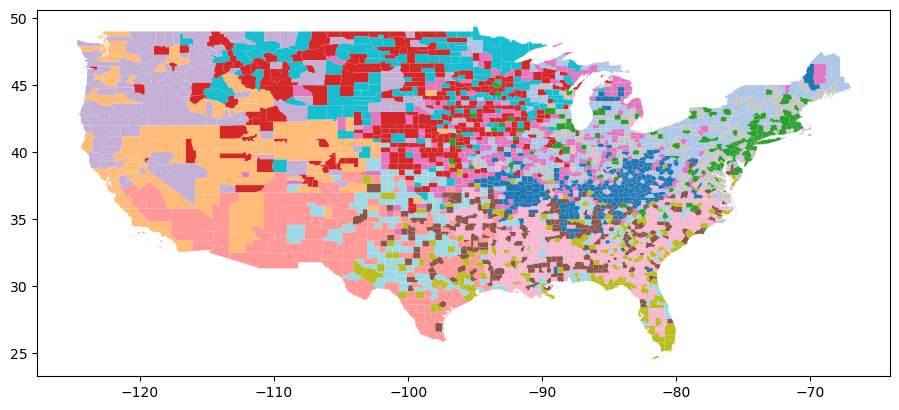

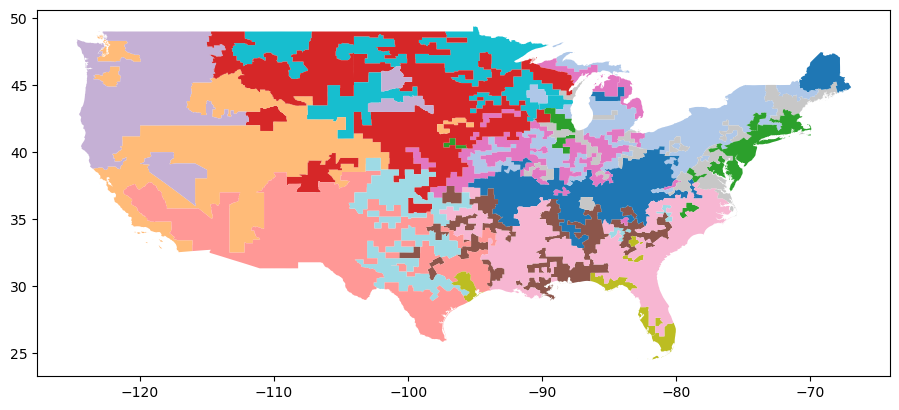

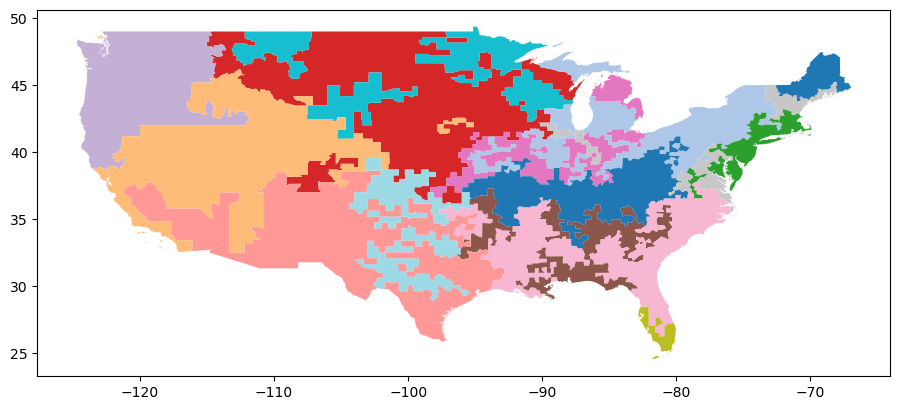

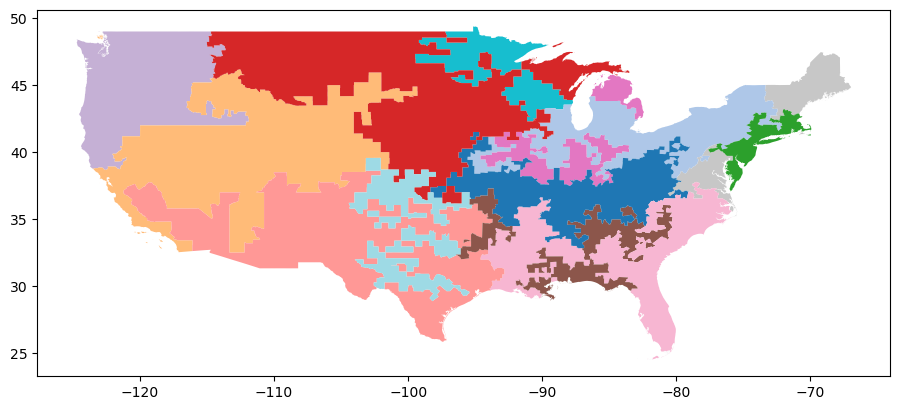

In [182]:
# np.unique(county_data['Region'])
county_data.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))
merged_data_7.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))
merged_data_20.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))
merged_data_50.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))
merged_data_100.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))
merged_data_200.plot('KMeans_cluster', cmap='tab20', figsize=(11,10))

In [107]:
print(neighbors)

                                             geometry  st     state st_abbr  \
0   POLYGON ((-86.92120 32.65755, -86.92036 32.658...   1   ALABAMA      AL   
1   POLYGON ((-86.96336 33.85823, -86.95967 33.857...   1   ALABAMA      AL   
2   POLYGON ((-85.59344 32.89727, -85.59334 32.984...   1   ALABAMA      AL   
3   POLYGON ((-86.19637 31.42544, -86.19396 31.440...   1   ALABAMA      AL   
4   POLYGON ((-88.13925 34.58780, -88.13872 34.589...   1   ALABAMA      AL   
5   POLYGON ((-86.69981 31.34807, -86.69729 31.347...   1   ALABAMA      AL   
6   POLYGON ((-87.15104 33.99323, -87.11200 33.992...   1   ALABAMA      AL   
7   POLYGON ((-85.79130 31.20986, -85.79114 31.281...   1   ALABAMA      AL   
8   POLYGON ((-86.41334 32.75060, -86.37116 32.750...   1   ALABAMA      AL   
9   POLYGON ((-86.36963 33.94119, -86.36805 33.942...   1   ALABAMA      AL   
10  POLYGON ((-85.41804 31.44078, -85.41578 31.490...   1   ALABAMA      AL   
11  POLYGON ((-85.71244 31.19688, -85.70935 31.198..

<AxesSubplot:>

<Figure size 1100x1000 with 0 Axes>

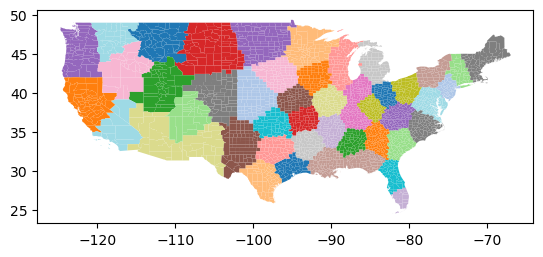

In [49]:
# Let's make states
kmeans = cluster.KMeans(n_clusters=48, random_state=2022)
kmeans.fit(X, sample_weight=county_data['e_totpop'])
# kmeans.fit(X)
county_data['KMeans_cluster'] = kmeans.labels_
plt.figure(figsize=(11,10))
county_data.plot('KMeans_cluster', cmap='tab20')

In [8]:
# Basic ML algorithm: which variables are most predictive?
county_data['Density2016_SqMi'] = county_data['Density2016_SqMi'].rank(pct = True)
predict_vars = ['rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4', 'Density2016_SqMi']
X = county_data[predict_vars]
y = county_data['Region']
model = LogisticRegression(max_iter=4000, multi_class='multinomial')
model.fit(X, y)

LogisticRegression(max_iter=4000, multi_class='multinomial')

In [31]:
# Assess performance
def assess_performance(model, data, y):
    predicts = model.predict_proba(data)
    predicts = predicts[:,1]
    return mean_squared_error(y, predicts)

In [32]:
loss = assess_performance(model, X, y)
print(loss)

51.50457370588017


<AxesSubplot:xlabel='coefficient', ylabel='Feature'>

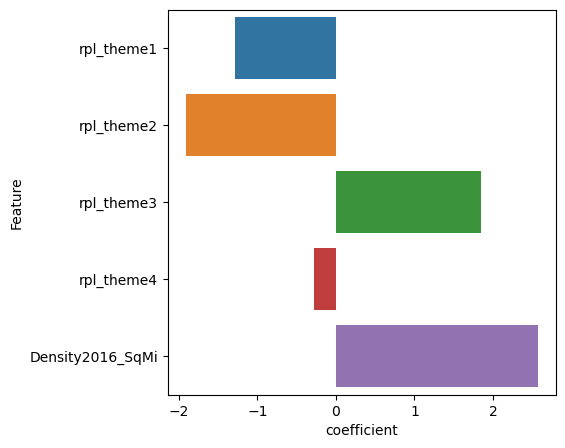

In [47]:
# Plot regression coefficients
model_coeff = pd.DataFrame({'Feature':X.columns, 'coefficient':model.coef_[5].transpose().flatten()})
model_coeff.head()
plt.figure(figsize=(5,5))
sns.barplot(data=model_coeff, y='Feature', x='coefficient')

In [ ]:
# Run an ANOVA on each variable, then rank variables by their test statistic


TODO:
Try predicting region
    How to predict with multiple classes?
    Decision tree might be better, if going to include location data

Try creating regions by clustering
    With other factors included

Make a function to plot counties (filled in)